In [98]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

Тестовое задание на позицию “Аналитик данных”
 
Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.
 Ссылка: https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing
 
Задание 1
 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category
 Дата – Order_date
 Сделать вывод на основе полученных результатов.

 Задание 2
 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

 Задание 3
 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

 Замечания: Работу лучше выполнить в jupyter и там же написать выводы по каждому заданию. После выполнения загрузите код на github.


In [99]:
gsheetid = '1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs' 
sheet_name = 'Sheet1'
gsheet_url = f'https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
df = pd.read_csv(gsheet_url)
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [100]:
# проверяем типы данных
df.dtypes

ID               int64
Order Date      object
Class           object
Region          object
Sub-Category    object
Sales           object
dtype: object

In [101]:
# проверяем на наличие пустых значений - их нет
df.isna().sum()

ID              0
Order Date      0
Class           0
Region          0
Sub-Category    0
Sales           0
dtype: int64

In [103]:
# Переименуем столбцы для удобства
df = df.rename(columns={"Order Date": "Order_Date", "Sub-Category": "Sub_Category"})

In [104]:
# Преобразуем типы данных для дальнейшей работы
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Sales'] = df['Sales'].str.replace(',', '.')
df['Sales'] = df['Sales'].astype(float)

### Задание 1
- а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)? 
- б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)? 
- в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [105]:
df[['ID','Sub_Category']].groupby('Sub_Category', as_index = False)\
                         .count().sort_values(by='ID', ascending=False)\
                         .head(4)

,Sub_Category,ID
3,Binders,1492
12,Paper,1338
9,Furnishings,931
13,Phones,876


- б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)? 
- в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [106]:
##Отфильтруем датасет,оставив только покупки за последние 2 года

In [115]:
max_date = df['Order_Date'].max()

2018-12-30 00:00:00


In [110]:
start_date_2_years = max_date - pd.DateOffset(years=2)
print(start_date_2_years)
start_date_1_year = max_date - pd.DateOffset(years=1)
print(start_date_1_year)


2016-12-30 00:00:00
2017-12-30 00:00:00


In [111]:
### отфильрованный датасет
df_last_2_years = df[(df['Order_Date'] >= start_date_2_years) & (df['Order_Date'] <= max_date)]
df_last_1_year = df[(df['Order_Date'] >= start_date_1_year) & (df['Order_Date'] <= max_date)]

Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)? 

In [113]:
df_last_2_years[['ID','Sub_Category']].groupby('Sub_Category', as_index = False)\
                                      .count().sort_values(by='ID', ascending=False).head(4)

,Sub_Category,ID
3,Binders,907
12,Paper,810
9,Furnishings,558
13,Phones,511


Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [114]:
df_last_1_year[['ID','Sub_Category']].groupby('Sub_Category', as_index = False)\
                                       .count().sort_values(by='ID', ascending=False).head(4)

,Sub_Category,ID
3,Binders,496
12,Paper,454
9,Furnishings,310
13,Phones,291


### Выводы
- 1. Самыми популярными подгруппами за все время продаж являются: Binders, Paper, Furnishings, Phones
- 2. Самыми популярными подгруппами за 2 последних года продаж являются: Binders, Paper, Furnishings, Phones
- 3. Самыми популярными подгруппами за все время продаж являются: Binders, Paper, Furnishings, Phones

### Задание 2
Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. Однако любые другие решения приветствуются

In [51]:
df

,ID,Order_Date,Class,Region,Sub_Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


Построим боксплот для исходных данных

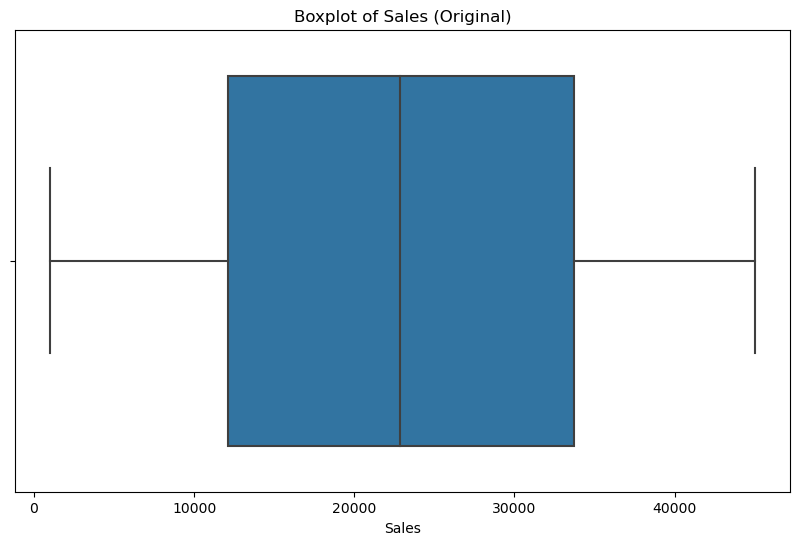

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales (Original)')
plt.xlabel('Sales')
plt.show()

In [53]:
df['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

In [54]:
# Очистка данных по правилу трех сигм
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Определение границ для выбросов
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

In [55]:
# Фильтрация данных для удаления выбросов
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Проверка очищенных данных
print(df_cleaned.describe())

                ID         Sales
count  9800.000000   9800.000000
mean   4900.500000  22921.757737
std    2829.160653  12601.999815
min       1.000000   1002.794000
25%    2450.750000  12135.625000
50%    4900.500000  22882.060000
75%    7350.250000  33730.130000
max    9800.000000  44995.410000


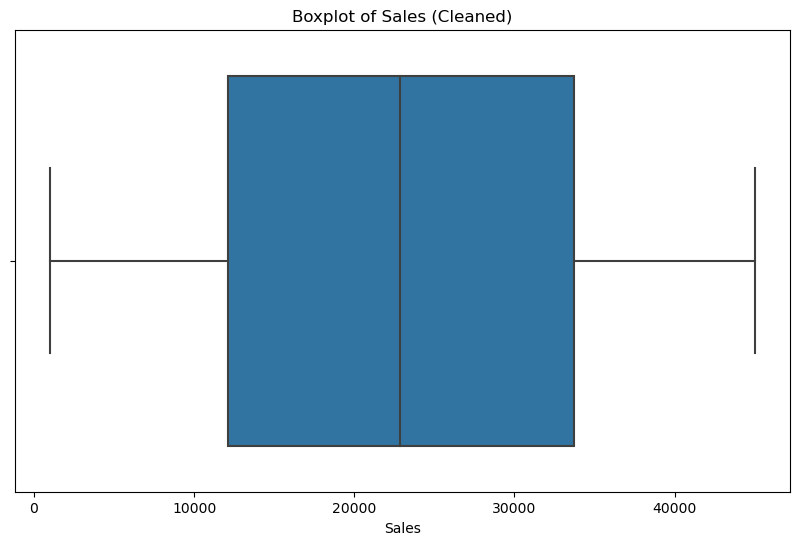

In [56]:
# Построение Boxplot для очищенных данных
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Sales'])
plt.title('Boxplot of Sales (Cleaned)')
plt.xlabel('Sales')
plt.show()

### Задание 3 
Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу

In [116]:
# Определяем границы для групп по 33 и 67 квартилю
sales = df['Sales']
quantiles = sales.quantile([0.33, 0.67])

def sale_group(amount):
    if amount <= quantiles[0.33]:
        return 'Low'
    elif amount <= quantiles[0.67]:
        return 'Medium'
    else:
        return 'High'

df['Sale_group'] = df['Sales'].apply(sale_group)

In [117]:
quantiles

0.33    15496.3926
0.67    30247.2916
Name: Sales, dtype: float64

In [118]:
df

,ID,Order_Date,Class,Region,Sub_Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,High
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,Medium
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,High
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,Low
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,Medium
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,Low
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,Low
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,Medium
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,Low


In [119]:
grouped_data = df.groupby(['Region','Sale_group'],as_index=False).agg({'Sales': ['sum', 'mean', 'count']})

In [120]:
grouped_data.columns = ['Region', 'Sale_group', 'Total_Sales', 'Average_Sales', 'Count']

In [121]:
grouped_data

,Region,Sale_group,Total_Sales,Average_Sales,Count
0,Владивосток,High,3.563117e+07,37506.495853,950
1,Владивосток,Low,7.643758e+06,8192.666490,933
2,Владивосток,Medium,2.067776e+07,22924.343670,902
3,Калиниград,High,3.760255e+07,37640.189019,999
4,Калиниград,Low,8.702214e+06,8473.431084,1027
5,Калиниград,Medium,2.562554e+07,23003.175197,1114
6,Москва,High,2.013750e+07,37569.955616,536
7,Москва,Low,4.225440e+06,8188.838050,516
8,Москва,Medium,1.252871e+07,22946.364231,546
9,Урал,High,2.798655e+07,37365.219319,749


In [122]:
grouped_data.groupby('Sale_group')['Total_Sales'].sum().idxmax()


'High'

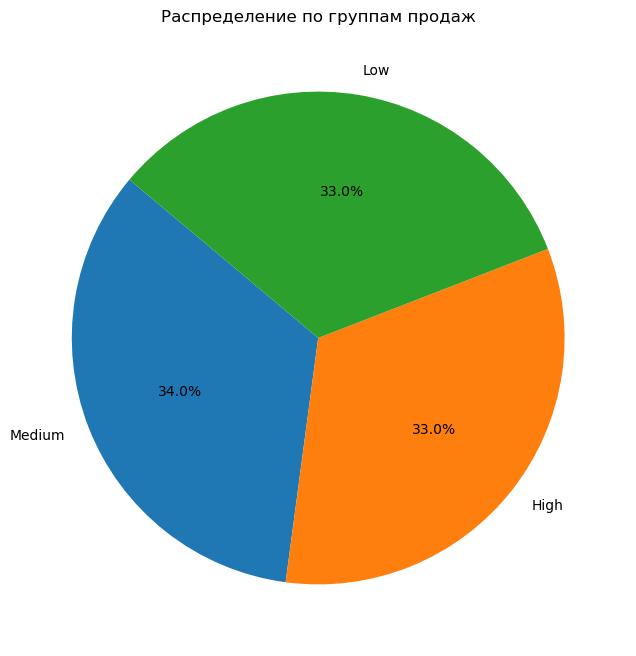

In [123]:
group_sales = df['Sale_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(group_sales, labels=group_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по группам продаж')
plt.show()

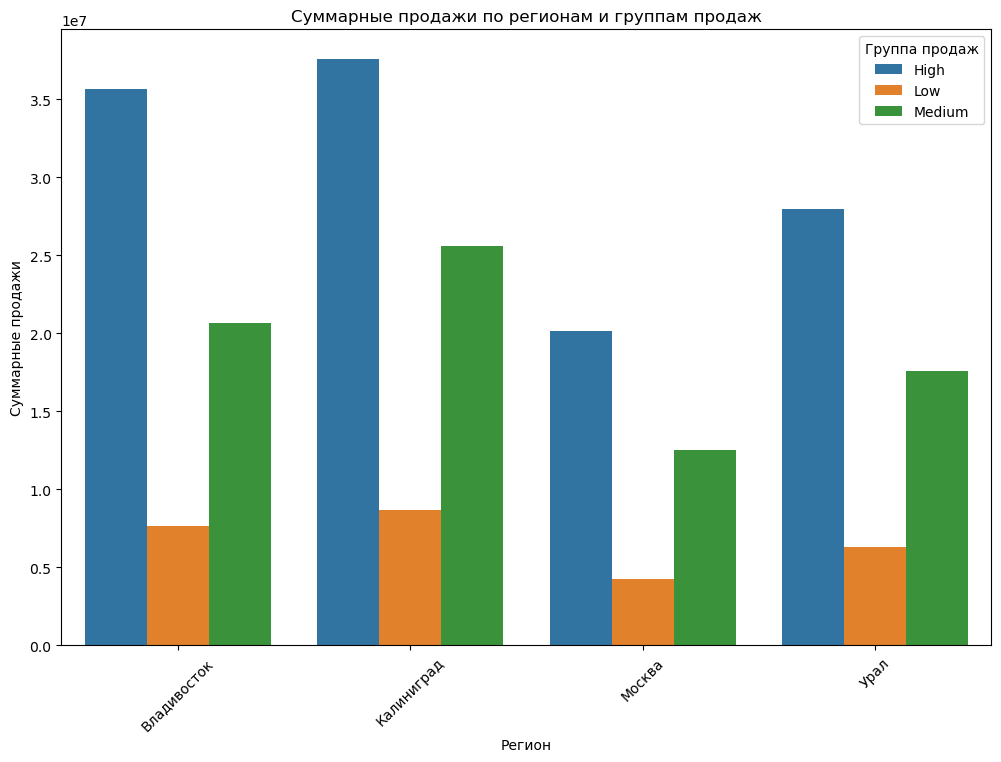

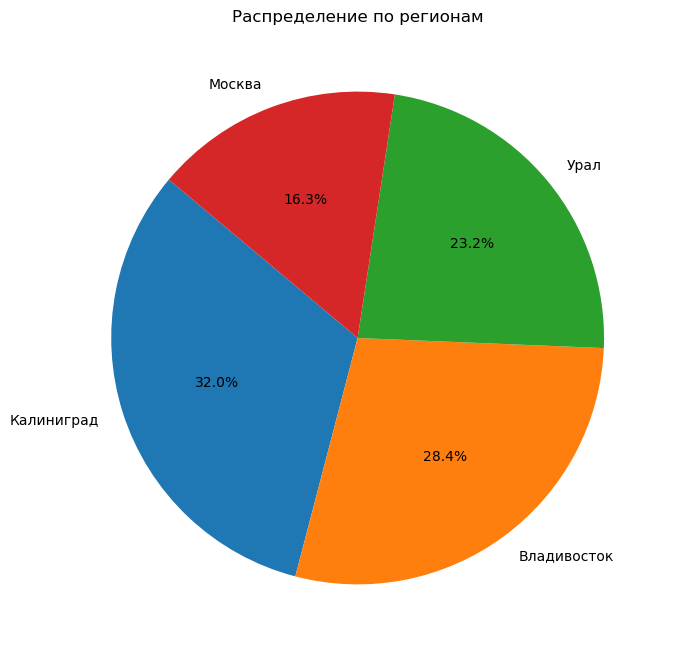

In [125]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Total_Sales', hue='Sale_group', data=grouped_data)
plt.title('Суммарные продажи по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend(title='Группа продаж')
plt.show()

region_sales = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по регионам')
plt.show()

Лидером по суммарным продажам является Калининград

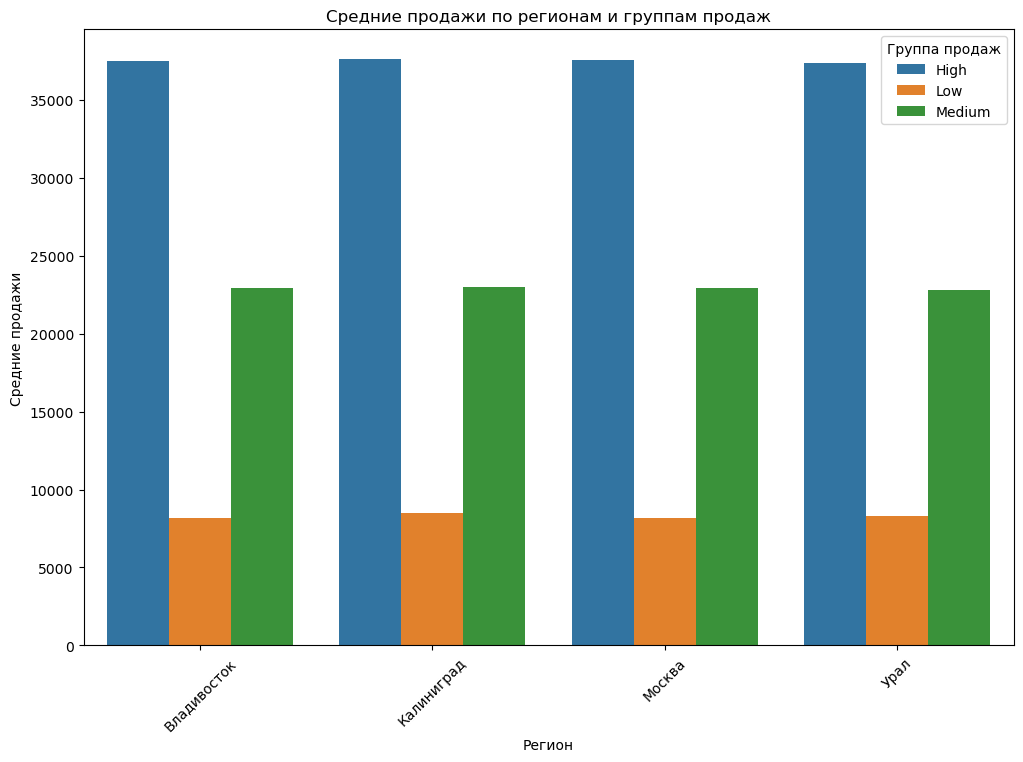

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Average_Sales', hue='Sale_group', data=grouped_data)
plt.title('Средние продажи по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Средние продажи')
plt.xticks(rotation=45)
plt.legend(title='Группа продаж')
plt.show()

По графику видно, что средние продажи во всех регионах примерно одинаковые

### Выводы:
     1. Лидером по продажам является Калиниград
     2. Средние продажи по группам во всех регионах практические одинаковые
     3. Распределение числа продаж по группам равное 